## Importing library required for web scrapping 

In [1]:
from flask import Flask, render_template 
import pandas as pd
import requests
from bs4 import BeautifulSoup 
from io import BytesIO
import base64
import matplotlib.pyplot as plt

### Get the URL for the web scrapping 

On this project, I am tryng to analyze the Kurs Jual and Kurs beli (ask and bid) that the data will be taken from site monexnews. 
We will use beautifulSoup for parsing the data 

In [2]:
url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=30-12-2019')
soup = BeautifulSoup(url_get.content,"html.parser")

### Check the data type

In [3]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's check and show the scrapped data using beautysoup

In [4]:
print(soup.prettify()[:1045])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://monexnews.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://monexnews.com/" target="_self"/>
  <title>
   Kurs Yen Jepang | JPY | Harga Nilai Tukar Yen Hari Ini | Monexnews
  </title>
  <meta content="Kurs yen jepang JPY, nilai tukar rupiah terhadap harga yen hari ini berdasar kurs tengah BI, Bank Indonesia. " name="description"/>
  <meta content="Kurs yen, jpy, nilai tukar yen, monexnews" name="keywords"/>
  <meta content="favicon.jpg" property="og:image"/>
  <meta content="Ultimaengine.com" name="author"/>
  <meta content="follow, index" name="robots"/>
  <meta content="7 days" name="revisit-after"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="M7NOlgqcEadhl

## Find the data that you need to analyze in the html file
In this case, since we want to find the data of Ask and bid currency for yen, the data is located in table, with class=table. so we go to the part of table class in the raw data/

<table class="table">
<tbody><tr>
<td>TANGGAL</td>
<td>ASK</td>
<td>BID</td>
</tr>
<tr class="verySoftGreyBg">
<td>14&nbsp;Mei&nbsp;2020</td>
<td>140,55</td>
<td>139,14</td>
</tr>


In [5]:
table = soup.find('table', attrs={'class':'table'})
print(table.prettify()[1:500])

table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>
   127,02
  </td>
 </tr>
 <tr>
  <td>
   27 Desember 2019
  </td>
  <td>
   128,11
  </td>
  <td>
   126,83
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   26 Desember 2019
  </td>
  <td>
   128,27
  </td>
  <td>
   126,98
  </td>
 </tr>
 <tr>
  <td>
   23 Desember 2019
  </td>
  <td>
   128,


As data resides in a table, and in each row, so we have to find the data in tr ( table row)

In [6]:
tr = table.find_all('tr')

check the output of tr to ensure the data is taken correctly 

In [8]:
tr



## Extracting the data from the scrapped HTML into a list 

First, we created an empty list that will be filled the data. then, extract the data using iteration / looping 

In [9]:
temp = [] 

In [10]:
for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get tanggal 
    Tanggal = row.find_all('td')[0].text
    Tanggal =  Tanggal.strip() #for removing the excess whitespace
    
    #get inflasi
    Kurs_Jual = row.find_all('td')[1].text
    Kurs_Jual = Kurs_Jual.strip() #for removing the excess whitespace

    #get inflasi
    Kurs_Beli = row.find_all('td')[2].text
    Kurs_Beli = Kurs_Beli.strip() #for removing the excess whitespace
    
    temp.append((Tanggal,Kurs_Jual,Kurs_Beli)) 

let's check the result

In [12]:
temp



In [13]:
temp = temp[::-1] #remove the header

In [77]:
temp



## Creating the DataFrame from the data list 
After extracting from the scrapped data into the list, next we can create a dataframe using the data and adding columns name for each the extracted data. 


In [14]:

df = pd.DataFrame(temp, columns = ('Tanggal','Kurs_Jual','Kurs_Beli'))


In [15]:
df 

,Tanggal,Kurs_Jual,Kurs_Beli
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"
2,04 Januari 2019,"133,51","132,17"
3,07 Januari 2019,"130,86","129,51"
4,08 Januari 2019,"129,84","128,52"
...,...,...,...
240,20 Desember 2019,"128,63","127,34"
241,23 Desember 2019,"128,39","127,10"
242,26 Desember 2019,"128,27","126,98"
243,27 Desember 2019,"128,11","126,83"


### Changing the local  format into Python  format
since the date in the data is using local date format ( Indonesian date format), we have to change the date format into recognized date format in Python, We could use library to change the date format such as dateparser or we just replace them with the built in library in Python

In [16]:
df['Tanggal']=df['Tanggal'].str.replace("Mei","May")
df['Tanggal']=df['Tanggal'].str.replace("Januari","Jan")
df['Tanggal']=df['Tanggal'].str.replace("Februari","Feb")
df['Tanggal']=df['Tanggal'].str.replace("Maret","Mar")
df['Tanggal']=df['Tanggal'].str.replace("April","Apr")
df['Tanggal']=df['Tanggal'].str.replace("Juni","Jun")
df['Tanggal']=df['Tanggal'].str.replace("Juli","Jul")
df['Tanggal']=df['Tanggal'].str.replace("Agustus","Aug")
df['Tanggal']=df['Tanggal'].str.replace("September","Sep")
df['Tanggal']=df['Tanggal'].str.replace("Oktober","Oct")
df['Tanggal']=df['Tanggal'].str.replace("November","Nov")
df['Tanggal']=df['Tanggal'].str.replace("Desember","Dec")

beside the local date, we have to change the local decimal number format ( indonesian number format) to recognized python format. the local decimal number format is using ',' and we have to change it to '.'

In [17]:
df['Kurs_Jual'] = df['Kurs_Jual'].str.replace(",",".")
df['Kurs_Beli'] = df['Kurs_Beli'].str.replace(",",".")

As the data of Kurs_Jual and Kurs_beli are in object data type, we should change them into floating data type

In [19]:
df['Kurs_Jual']=df['Kurs_Jual'].astype('float')
df['Kurs_Beli']=df['Kurs_Beli'].astype('float')

In [20]:
df['Tanggal']

0      02 Jan 2019
1      03 Jan 2019
2      04 Jan 2019
3      07 Jan 2019
4      08 Jan 2019
          ...     
240    20 Dec 2019
241    23 Dec 2019
242    26 Dec 2019
243    27 Dec 2019
244    30 Dec 2019
Name: Tanggal, Length: 245, dtype: object

As we did in data kurs, we have to change the data type of Tanggal, from object into datetime datatypes

In [21]:
df['Tanggal']=df['Tanggal'].astype('datetime64')

Let's check the data type of data has been correctly applied

In [22]:
df.dtypes

Tanggal      datetime64[ns]
Kurs_Jual           float64
Kurs_Beli           float64
dtype: object

I would like to set the tanggal as an index in X axis in plot chart, so I change it  to index

In [23]:
df = df.sort_values(by='Tanggal').set_index('Tanggal')

In [24]:
df

,Kurs_Jual,Kurs_Beli
Tanggal,,
2019-01-02,132.89,131.54
2019-01-03,135.44,134.08
2019-01-04,133.51,132.17
2019-01-07,130.86,129.51
2019-01-08,129.84,128.52
...,...,...
2019-12-20,128.63,127.34
2019-12-23,128.39,127.10
2019-12-26,128.27,126.98


If you want to resample the data from daily into monhtly or weekly , you could do it using resample. in this case, I will not do resample

In [141]:
#df = df.resample('M').mean()

just check the index whether it is correct

In [43]:
df.index

DatetimeIndex(['2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02',
               '2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02',
               '2019-01-02', '2019-01-02',
               ...
               '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
               '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Tanggal', length=490, freq=None)

## Creating the Plot

Since the data is time series, we could use line chart for this purpose.

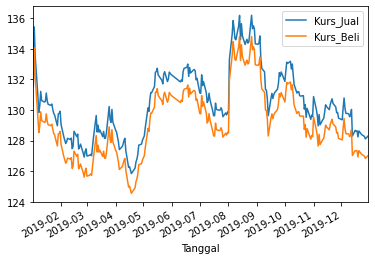

In [86]:
df.plot()

## The Analysis

From the chart, There are some pieces of information we could gather regarding the data of Ask and Bid for Yen currency im 2019. The first, The Kurs_Jual is always higher than Kurs_Beli. In August 2019, the Kurs Jual and the kurs_beli reach the highest rate among all months in 2019 to around 134 - 136. and they reach the lowest rate in month of April. The rate varies from 124 to 136 